<a href="https://colab.research.google.com/github/JacobDowns/CSCI-491-591/blob/main/lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy


*   NumPy is a useful package for accelerating numerical computations in Python
*   Many complex loops, numerical algorithms, or mathematical operations can be translated to NumPy for efficiency
* Implementing numerical operations in NumPy is typically dramatically faster than using basic Python loops
* Under the hood, NumPy is primarily written in C
* Allocating an array, for example, allocates a chunk of memory that can be referenced in C, Fortran, and Python
* You can think of this as a chunk of shared memory
* Mathematical operations are implemented implemented in C or Fortran, taking advantage of optimized numerical libraries
* **Takeaway: operations on arrays are converted to loops in a faster language!**



## Vectorization

* Vectorization describes the abasence of any explicit looping / indexing in the code
* These are handled behind the scenes
* Vectorization can make some code very concise and clean
* One disadvantage is that it can take some effort to shift your thinking from loops to vectorized operations

## NDArrays

*   NumPy defines an n-dimensional array (ndarray) where every element in the array has the same data type
* Unlike Python lists, ndarrays have a fixed size at creation
*  Examples: float32, float64, int32, int64, etc.
* It is common to use high-dimensional arrays in NumPy
* There are many typical ways to allocate new arrays in NumPy
* Many other scientific and numerical packages use ndarrays or support NumPy-like syntax
* Operations on high-dimensional arrays can often be written very consisely using far less code than the equivalent loops
* NumPy often rewards thinking in terms of higher-dimensional arrays



## Defining Arrays

In [2]:
import numpy as np

In [ ]:
# 1d array
x = np.array([1,2,3,4,5])
x

array([1, 2, 3, 4, 5])

In [ ]:
# 2d array (array of 1d arrays)
x = np.array([
    [1,2,3],
    [4,5,6]
])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
# 3d array  (Array of 2d arrays)
x = np.array([
    [[1,2,3],[4,5,6]],
    [[7,8,9],[10,11,12]]
])
x

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [5]:
# You can get the shape of an array with .shape
x.shape

(2, 2, 3)

In [6]:
# The number of elements is given by size
x.size

12

In [7]:
# The dimensionality of the array
x.ndim

3

There are several short-hand ways of defining common arrays

In [ ]:
# 1d array of zeros
x = np.zeros(3)
x

array([0., 0., 0.])

In [ ]:
# 2d array of zeros
x = np.zeros((3,3))
x

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# 3d Array of zeros
x = np.zeros((3,3,3))
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
# An array of ones
x = np.ones(3)
x

array([1., 1., 1.])

In [ ]:
# Numpy will assume a default type, dpending on how the array is created
x.dtype

dtype('float64')

In [ ]:
# However you can define a specific type as follows
x = np.ones(3, dtype=np.int64)
x.dtype

dtype('int64')

In [ ]:
# Or you can cast to a differnt type
x = x.astype(np.float32)
x

array([1., 1., 1.], dtype=float32)

In [ ]:
# Another common way to define an array is using arange
# generates values starting at 0 up to (but excluding) ten
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# It has int64 type by default
x.dtype

dtype('int64')

In [ ]:
# You can also define, the start, stop, and step size explicitly.
# These don't have to be integers.
x = np.arange(1,10,0.5)
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5])

In [ ]:
# Another useful function is linspace, which produces evenly spaced numbers
# along an interval. Endpoint included by default
x12 = np.linspace(0.,1.,10)
x12

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

## Reshaping

You can reshape an array as long as the total number of elements "checks out". That is, the size of the original array and the reshaped arrays need to be the same. By default reshape uses row major order. This means elements are read in a C-like index order where the last axis index changes fastest.

In [ ]:
# Flattening array
x = np.arange(25)
x = x.reshape((5,5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
# You can also change the order in memory. For exmaple, reshaping
# to Fortran-like order:
x = np.arange(25)
x = x.reshape((5,5), order='F')
x

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

In [ ]:
# Arrays can also be flattened in numerous ways, which turns them into a 1d array.
x = np.arange(25).reshape((5,5))
x.reshape((25,))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
# Using flatten
x = np.arange(25).reshape((5,5))
x.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

## Views Versus Copies

Note that some functions in NumPy return views of the original array, while others return copies. For example, the functions *ravel* and *flatten* are similar, but ravel returns a view of an array, whereas flatten returns a copy. Returning a view is faster and uses less memory. However, be aware that modifying it modifies the original array. This is important to keep in mind so you know which operations have side effects.

In [ ]:
import numpy as np

a = np.array([
    [1, 2],
    [3, 4]
])

r = a.ravel()
f = a.flatten()

r[0] = 99
f[1] = 88

print("Original:\n", a)
print("ravel:\n", r)
print("flatten:\n", f)

Original:
 [[99  2]
 [ 3  4]]
ravel:
 [99  2  3  4]
flatten:
 [ 1 88  3  4]


In [ ]:
# You can check if an array is based on another array.
print(r.base is a)
print(f.base is a)
# For example, if r.base is a returns true, it means that r is a view
# into the memory of a

True
False


In [ ]:
# You can also check if two arrays share memory like this
(np.shares_memory(a, r), np.shares_memory(a, f))

(True, False)

## Basic Indexing

In [ ]:
# Indexing works how you would expect
x = np.arange(10)
print(x)
print(x[0], x[1], x[9])

[0 1 2 3 4 5 6 7 8 9]
0 1 9


In [ ]:
# You can use negative indexes to start indexing from the last element of an array
print(x)
print(x[-1])

[0 1 2 3 4 5 6 7 8 9]
9


In [ ]:
# For example, the second to last element...
print(x)
print(x[-2])

[0 1 2 3 4 5 6 7 8 9]
8


In [ ]:
# Indexes work how you'd expect for 2d arrays. The indices refer to rows then columns.
x = np.array([
    [1,2,3],
    [4,5,6]
])
print(x)
print(x[0,0], x[0,1], x[1,0], x[1,-1])

[[1 2 3]
 [4 5 6]]
1 2 4 6


In [ ]:
# What will this output?
print(x[-1, 1])

5


In [ ]:
# 3d arrays, you know the drill.
x = np.array([
    [[1,2,3],[4,5,6]],
    [[7,8,9],[10,11,12]]
])
print(x[0,0,0], x[0,0,1], x[1,0,0])

1 2 7


This is all pretty straightforward, but as you get to higher dimensional arrays, it can get harder to think about what's happening with indexing. One potentially useful way of thinking about high dimensional arrays is to think about indexing as a way of dissecting the array into subarrays.

In [ ]:
# So we have this 3d array. Let's look at x[1]. This will
# pull out the second subarray (which is 2d)
x = np.array([
    [[1,2,3],[4,5,6]],
    [[7,8,9],[10,11,12]]
])
x[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
# The notation x[1][1] or x[1,1] pulls out the second subarray (which is 1d)
# from x[1]
print(x[1][1])
# Equivalently, we can write
x[1,1]

[10 11 12]


array([10, 11, 12])

In [ ]:
# Simarlarly, indexing x[1][1][2] or x[1,1,2] pulls out the third element of the
# subarray x[1][1]
print(x[1][1][2], x[1,1,2])

12 12


Often, thinking about what subarrays represent can help you keep better track of things. For instance, a 3d array of size $n \times j \times k$ might represent a stack of $n$ images with size $j \times k$.

## Fancy Indexing In Numpy

In [ ]:
# Slicing lets you pull out portions of an array of interest.
y = np.arange(20)
# For example, this returns elements at indexes 5,6,7,8.
# Note that, for a slice i:j, the j-th element is not included
print(y)
print(y[5:9])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[5 6 7 8]


**From the Numpy guide:**
*The basic slice syntax is $i:j:k$ where $i$ is the starting index, $j$ is the stopping index, and $k$ is the step ($k \neq 0$)
). This selects the m elements (in the corresponding dimension) with index values $i, i + k, …, i + (m - 1) k$ where
 and $q$ and $r$ are the quotient and remainder obtained by dividing $j - i$ by $k: j - i = q k + r$, so that $i + (m - 1) k < j$.*


In [ ]:
# This is a lot of mathematical notation, but basically, you can use steps bigger
# than 1.
y[0:11:2]

array([ 0,  2,  4,  6,  8, 10])

In [ ]:
# There is special syntax for slicing from the beginning of an array to a given index
y[:5]

array([0, 1, 2, 3, 4])

In [ ]:
# Or for slicing from a given index to the end of the array
y[5:]

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
# You can get every n-th element of an array ussing [::n]
y[::3]

array([ 0,  3,  6,  9, 12, 15, 18])

In [ ]:
# Or reverse an array with [::-1]. These work with multi-demensional arrays too.
y[::-1]

array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  0])

In [ ]:
# Slicing can be done in any dimension. The notation :
# means get all elements in a given dimension, so this will return the first and second
# elements of each row
y = np.arange(25).reshape((5,5))
print(y)
print(y[:,0:2])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0  1]
 [ 5  6]
 [10 11]
 [15 16]
 [20 21]]


In [ ]:
# What will this return?
y[1:-1,1:-1]

array([[ 6,  7,  8],
       [11, 12, 13],
       [16, 17, 18]])

## Exercise 1
Create a checkboard using an array of integers with 0 for black and 1 for white.

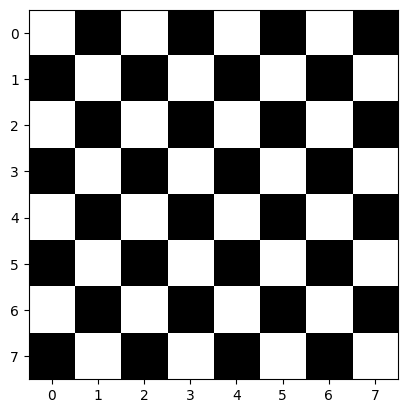

In [ ]:
import matplotlib.pyplot as plt
board = np.zeros((8,8), dtype=int)
board[1::2,1::2] = 1
board[::2,0::2] = 1
plt.imshow(board, cmap='gray')


## Dimensional Indexing

There are some tools to facilitate the easy matching of array shapes with expressions and in assignments. For instance, the notation `[..., ]` expands to the number of `:` objects to index all dimension. There can be only one ellipses when indexing.

In [ ]:
# For instance, these are the same
y = np.arange(125).reshape((5,5,5))
print(y[...,0])
print(y[:,:,0])

[[  0   5  10  15  20]
 [ 25  30  35  40  45]
 [ 50  55  60  65  70]
 [ 75  80  85  90  95]
 [100 105 110 115 120]]
[[  0   5  10  15  20]
 [ 25  30  35  40  45]
 [ 50  55  60  65  70]
 [ 75  80  85  90  95]
 [100 105 110 115 120]]


In [ ]:
y

array([[[  0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9],
        [ 10,  11,  12,  13,  14],
        [ 15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24]],

       [[ 25,  26,  27,  28,  29],
        [ 30,  31,  32,  33,  34],
        [ 35,  36,  37,  38,  39],
        [ 40,  41,  42,  43,  44],
        [ 45,  46,  47,  48,  49]],

       [[ 50,  51,  52,  53,  54],
        [ 55,  56,  57,  58,  59],
        [ 60,  61,  62,  63,  64],
        [ 65,  66,  67,  68,  69],
        [ 70,  71,  72,  73,  74]],

       [[ 75,  76,  77,  78,  79],
        [ 80,  81,  82,  83,  84],
        [ 85,  86,  87,  88,  89],
        [ 90,  91,  92,  93,  94],
        [ 95,  96,  97,  98,  99]],

       [[100, 101, 102, 103, 104],
        [105, 106, 107, 108, 109],
        [110, 111, 112, 113, 114],
        [115, 116, 117, 118, 119],
        [120, 121, 122, 123, 124]]])

In [ ]:
# What will this return?
y[1,...,1]

array([26, 31, 36, 41, 46])

Singleton dimensions can be added anywhere via special notation. You can think of this as wrapping an element or a sub-array in another array. We'll see why this can be useful later when we discuss broadcasting.

In [ ]:
# "Wrapping" elements in a one dimensional array
y = np.linspace(0.,1.,5)
print(y)
print(y[:,None])
print(y[:,None].shape)

[0.   0.25 0.5  0.75 1.  ]
[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]
(5, 1)


In [ ]:
# Wrapping arrays in a 2d array
y = np.ones((3,3))
print(y)
print(y[:,None,:])
print(y[:,None,:].shape)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[[1. 1. 1.]]

 [[1. 1. 1.]]

 [[1. 1. 1.]]]
(3, 1, 3)


In [ ]:
# These statements are equivalent. You can substitute np.newaxis for None
print(y[:, np.newaxis, :])
print(y[:, None, :])

[[[1. 1. 1.]]

 [[1. 1. 1.]]

 [[1. 1. 1.]]]
[[[1. 1. 1.]]

 [[1. 1. 1.]]

 [[1. 1. 1.]]]


## Advanced Indexing

**From the Numpy Guide:** *Advanced indexing is triggered when the selection object, obj, is a non-tuple sequence object, an ndarray (of data type integer or bool), or a tuple with at least one sequence object or ndarray (of data type integer or bool). There are two types of advanced indexing: integer and Boolean.*

Note that advanced indexing returns copies of the data rather than views.

In [ ]:
# Arrays can be indexed by other arrays of integers
z = np.arange(10)
indexes = np.array([9,3,1,4])
z[indexes]

array([9, 3, 1, 4])

In [ ]:
# You can also index using plain Python lists
z[[9,3,1,4]]

array([9, 3, 1, 4])

In [ ]:
# For higher dimensional arrays you can pass in multiple arrays of integers
# of the same size for each dimension
z = np.arange(100).reshape((10,10))
indexes0 = np.array([9,3,1,4])
indexes1 = np.array([1,2,3,4])
z[indexes0,indexes1]

array([91, 32, 13, 44])

In [ ]:
# It's also common to use boolean indexing
z = np.arange(10)
indexes = np.array([True, False, True, False, True, False, True, False, True, False])
z[indexes]

array([0, 2, 4, 6, 8])

In [ ]:
# Boolean indexing is often used with comparison operators
# This identifies the elements greater than 4
indexes = z > 4
indexes

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [ ]:
# This syntax pulls out elements corresponding to those indexes into a flat array
z[indexes]

array([5, 6, 7, 8, 9])

In [ ]:
# This works for higher dimensional arrays naturally
z = np.arange(125).reshape((5,5,5))
indexes = z > 10
z[indexes]

array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124])

In [ ]:
# You can also assign values to a set of indices
z = np.arange(10)
z[[0,5,9]] = 0
z

array([0, 1, 2, 3, 4, 0, 6, 7, 8, 0])

In [ ]:
# What will this return?
X = np.zeros((5,5))
X[np.arange(5), np.arange(5)] = 1.
X

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
# Is this valid? What will this return?
X = np.zeros((5,5))
X[np.arange(5), :] = np.arange(5)
X

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

In [ ]:
# The equivalent loop
X = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    X[i,j] = j
X

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

## Splitting, Merging, and Building Arrays

There are many ways of concatenating and merging NumPy arrays using functions like concatenate and stack. Concatenating arrays combines them on an existing axis. This means that the size (or number of elements in that axis) increases, but no new axes are created.

In [8]:
# Example of concatenation.
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.concatenate((a,b))
c

array([1, 2, 3, 4, 5, 6])

In [9]:
print(a.shape, b.shape, c.shape)

(3,) (3,) (6,)


Higher dimensional arrays can be concatenated too. By default, arrays are concatenated along the first axis. Thus, concatenating an $n \times k$ array and a $j \times k$ array would yield an $(n+j)\times k$ array.  

In [11]:
# Concatenating multi-dimensional arrays
a = np.array([
    [1,2,3],
    [4,5,6]
])
b = np.array([
    [7,8,9],
    [10,11,12]
])
np.concatenate((a,b))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

You can specify a different axis of concatenation. So for instance if you have an $n \times k$ and an $n \times j$ array, you can concatenate along the second axis to get an $n \times (j+k)$ array.

In [12]:
# This, in turn, will concatenate along the second dimension so if you have an nxk and a nxj array, you get
# an nx(k+j) output
c = np.concatenate((a,b), axis=1)
print(c)
print(c.shape)

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
(2, 6)


In [ ]:
# What's would be the shape of this concatenated array?
a = np.zeros((3,3,3))
b = np.ones((3,3,3))
c = np.concatenate((a,b), axis=2)
c.shape

(3, 3, 6)

In [13]:
# What are the elements of the array?
c

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [14]:
# Unlike concatenation, stacking joins arrays along a new axis
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
d = np.stack((a,b,c))
d.shape

(3, 3)

In [15]:
d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [31]:
# Stacking can also be done for different axes
a = np.array([
    [1,2,3],
    [4,5,6]
])
b = np.array([
    [7,8,9],
    [10,11,12]
])
c = np.stack((a,b), axis=0)
c.shape

(2, 2, 3)

In [32]:
print('a')
print(a)
print('b')
print(b)
print('c')
print(c)

a
[[1 2 3]
 [4 5 6]]
b
[[ 7  8  9]
 [10 11 12]]
c
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [33]:
# What is the expected output of this?
c = np.stack((a,b), axis=1)
c.shape

(2, 2, 3)

In [34]:
# And what does the resulting array look like?
print('a')
print(a)
print('b')
print(b)
print('c')
print(c)

a
[[1 2 3]
 [4 5 6]]
b
[[ 7  8  9]
 [10 11 12]]
c
[[[ 1  2  3]
  [ 7  8  9]]

 [[ 4  5  6]
  [10 11 12]]]


There are some special functions for 2d arrays. For example hsplit operates on 2d arrays, splitting them into a given number of equally sized sub-arrays.

In [ ]:
# Splitting up the rows in the array into 3 separate arrays
a = np.array([[1, 2, 3],
              [4, 5, 6]])

np.hsplit(a, 3)

[array([[1],
        [4]]),
 array([[2],
        [5]]),
 array([[3],
        [6]])]

In [ ]:
# vsplit is similar, but splits up rows instead of columns.
np.vsplit(a, 2)

[array([[1, 2, 3]]), array([[4, 5, 6]])]

## Operations on arrays
So far we've seen how to build, index, and manipulate arrays. Now we can do something useful with them! NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example:

In [ ]:
# Multiplying, dividing, adding element-wise
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
print(a*b, a/b, a+b)

[2. 4. 6.] [0.5 1.  1.5] [3. 4. 5.]


In [ ]:
# Basic unary operations are also performed element-wise
x = np.arange(5)
print(x, x**2, np.sqrt(x), np.exp(x))

[0 1 2 3 4] [ 0  1  4  9 16] [0.         1.         1.41421356 1.73205081 2.        ] [ 1.          2.71828183  7.3890561  20.08553692 54.59815003]


One of the most important features in NumPy is broadcasting, which allows for operations between arrays of different shapes. The most basic form of broadcasting occurs between arrays and constants.

In [ ]:
# Consider some operations between constants and arrays
x = np.ones(5)
print(x*2., x+2.)


[2. 2. 2. 2. 2.] [3. 3. 3. 3. 3.]


This is what NumPy is doing automatically to make this work.

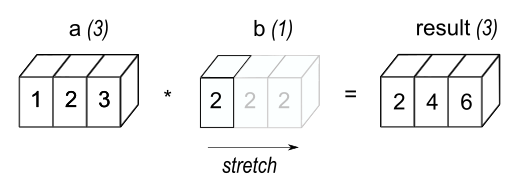

## Broadcasting
Broadcasting is extremely useful and can make some complex code very concise. The NumPy guide lays out the basic rules for broadcasting:




When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when they are equal or one of them is 1.


Input arrays do not need to have the same number of dimensions. The resulting array will have the same number of dimensions as the input array with the greatest number of dimensions, where the size of each dimension is the largest size of the corresponding dimension among the input arrays. Note that missing dimensions are assumed to have size one.

In [ ]:
# Adding a 1-d array to a 2d array
a = np.array([[ 0.0,  0.0,  0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

NumPy is implicitly doing this stretching and copying to make the array dimensions match:

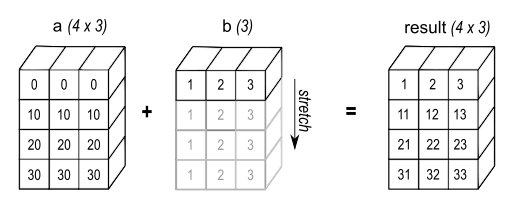

In [ ]:
# For a slightly more useful example, consider computing a matrix of pairwise distances
x = np.linspace(0., 1., 10)
y = np.linspace(0., 1., 10)
d = np.sqrt((x[:, None] - y)**2)

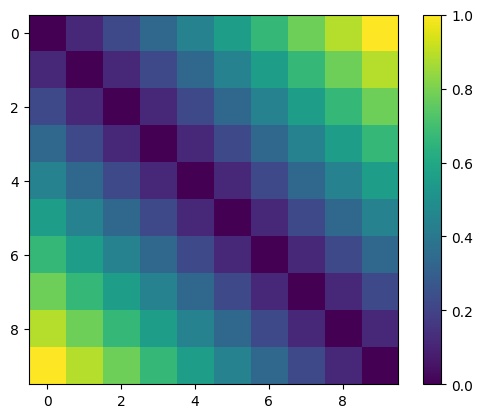

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(d)
plt.colorbar()
plt.show()

## Agregation Functions / Statistics
* Statistical function and agregation functions can be applied to whole arrays, dimensions, or even combinations of dimensions. Below are some examples using mean, but others include sum, min, max, std, etc.

In [51]:
x = np.random.randn(4, 3, 5) + 1.
# Take the mean over the entire array.
print(x.mean())

0.9900261592874597


In [52]:
# Take the mean over an axis
x1 = x.mean(axis=0)
print(x1.shape)
print(x1)

(3, 5)
[[0.76925896 1.04275244 1.05210646 1.5195893  1.32908323]
 [0.80057488 0.62109534 0.79578066 0.50735622 1.05753116]
 [1.4434655  0.50610546 0.57979729 1.29063904 1.53525645]]


In [53]:
# Take the mean over multiple axes
x1 = x.mean(axis=(0,2))
print(x1.shape)
print(x1)

(3,)
[1.14255808 0.75646765 1.07105275]


Suppose you have this array where axis 0 represents a particular class, axis 1 represents a particular student, and axis 2 represents a grade the student achieved in class.

In [64]:
# Scores for 4 classes, each with 25 students, and ten assignments
scores = np.random.rand(4, 25, 10)
scores.shape

(4, 25, 10)

How would we get the mean score for each student in each class?

In [66]:
np.mean(scores, axis=2)

(4, 25)

How would we get the mean score for each student across all classes?

In [68]:
np.mean(scores, axis=(0,2))

array([0.51586755, 0.54182457, 0.57835194, 0.53649144, 0.57683518,
       0.53747577, 0.52144023, 0.54990028, 0.55289924, 0.52301495,
       0.48011188, 0.46338902, 0.46831534, 0.59653737, 0.4776591 ,
       0.56923328, 0.47920973, 0.50877945, 0.48984391, 0.48964872,
       0.48617466, 0.5109987 , 0.4562542 , 0.51409981, 0.47993156])

## Linear Algebra

NumPy contains a host of functions for handling linear algebra operations like matrix multiplication, vector norms, inner and outer products, etc.

In [79]:
# Matrix vector multiplication
A = np.array([[1, 2],
              [3, 4]])
b = np.array([5, 6])
x = np.dot(A, b)
print(x)

[17 39]


In [80]:
# Determinant of a matrix
np.linalg.det(A)

np.float64(-2.0000000000000004)

In [82]:
# Matrix inverse
A_inv = np.linalg.inv(A)
print(A_inv)
# And matrix multiplication
print(A @ A_inv)
# Which can also be written
print(np.matmul(A, A_inv))
print(np.dot(A, A_inv))

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [75]:
# Solving a linear system
x = np.linalg.solve(A, b)
print(x)

[-4.   4.5]


In [77]:
# Computing Eigen values and vectors
eigvals, eigvecs = np.linalg.eig(A)
print("\nEigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)


Eigenvalues: [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
